In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv("project_water_quality_data.csv")
df

,Characteristic,Turbidity,pH,Sp. Conductivity,D. Solids,Nitrate Nitrogen,Phosphate (PO4),Chloride,Sulphate (SO4),T. Alkalinity,T. Hardness,CalciumHardness,Magnesium H.,D. Oxygen,B.O.D.,C.O.D.,year
0,Unit,NTU,pH Unit,�Mhos/cm.,mg/1,mg/1,mg/1,mg/1,mg/1,mg/1,mg/1,mg/1,mg/1,mg/1,mg/1,mg/1,NaN
1,16-03-2016,2.7,8.3,211,154,0.4,0.8,7.92,3.8,10,138,90,48,7.6,1.3,11,2016.0
2,21-04-2016,2.6,7.48,376,232,0.2,0.4,14.9,4.2,14,110,75,5,7.7,1.4,14,2016.0
3,18-05-2016,2.4,7.69,411,204,0.3,0.7,6.9,3.8,28,134,88,46,7.3,1,12,2016.0
4,14-06-2016,2,7.34,582,314,0.16,0.04,14.99,5.4,16,106,72,34,7.9,1.5,12,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,01-10-2019,3,8.34,390,374,0.34,0.112,15,10,12,164,128,36,7.2,1.5,32,2019.0
333,01-11-2019,4,8.12,302,254,0.8,0.13,12,8,38,144,92,46,7.5,1.5,16,2019.0
334,01-12-2019,2,7.6,238,192,0.35,0.012,14.48,6,25,90,70,20,7.6,1.4,12,2019.0
335,01-01-2020,2,8.19,273,217,1.3,0.112,6.93,2.87,32,76,42,34,7.7,1.6,12,2020.0


In [4]:
# Standard Values
vs = {
    "pH": 9.06,
    "Turbidity": 5,
    "temp": 25,
    "Conductivity": 1500,
    "Hardness": 500,
    "Alkalinity": 120,
    "Dissolved_oxygen": 8,
    "BOD": 4,
    "COD": 25,
    "Ammonium": 0.2,
    "Nitrate": 5,
    "Nitrite": 1,
    "Phosphate": 0.65
}

# Ideal Values
vi = {
    "pH": 7,
    "Turbidity": 0,
    "Temperature": 0,
    "Conductivity": 0,
    "Hardness": 0,
    "Alkalinity": 0,
    "Dissolved_oxygen": 14.6,
    "BOD": 0,
    "COD": 0,
    "Ammonium": 0,
    "Nitrate": 0,
    "Nitrite": 0,
    "Phosphate": 0
}

# Dropping unnecessary columns and rows
data = df.drop(['Characteristic', 'CalciumHardness', 'D. Solids', 'Chloride', 'Sulphate (SO4)', 
                'Magnesium H.'], axis=1)
data = data.drop(df.index[0])
data = data.reset_index(drop=True)
data




,Turbidity,pH,Sp. Conductivity,Nitrate Nitrogen,Phosphate (PO4),T. Alkalinity,T. Hardness,D. Oxygen,B.O.D.,C.O.D.,year
0,2.7,8.3,211,0.4,0.8,10,138,7.6,1.3,11,2016.0
1,2.6,7.48,376,0.2,0.4,14,110,7.7,1.4,14,2016.0
2,2.4,7.69,411,0.3,0.7,28,134,7.3,1,12,2016.0
3,2,7.34,582,0.16,0.04,16,106,7.9,1.5,12,2016.0
4,1.3,7.28,368,0.4,0.5,8,138,7.4,1.5,9,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
331,3,8.34,390,0.34,0.112,12,164,7.2,1.5,32,2019.0
332,4,8.12,302,0.8,0.13,38,144,7.5,1.5,16,2019.0
333,2,7.6,238,0.35,0.012,25,90,7.6,1.4,12,2019.0
334,2,8.19,273,1.3,0.112,32,76,7.7,1.6,12,2020.0


In [5]:
# Renaming columns
data = data.rename(columns={'Sp. Conductivity':'Conductivity', 'Nitrate Nitrogen':'Nitrate', 
                            'Phosphate (PO4)':'Phosphate', 'T. Alkalinity':'Alkalinity', 
                            'T. Hardness':'Hardness', 'D. Oxygen':'Dissolved_oxygen', 
                            'B.O.D.':'BOD', 'C.O.D.':'COD', 'year':'year'})
data

,Turbidity,pH,Conductivity,Nitrate,Phosphate,Alkalinity,Hardness,Dissolved_oxygen,BOD,COD,year
0,2.7,8.3,211,0.4,0.8,10,138,7.6,1.3,11,2016.0
1,2.6,7.48,376,0.2,0.4,14,110,7.7,1.4,14,2016.0
2,2.4,7.69,411,0.3,0.7,28,134,7.3,1,12,2016.0
3,2,7.34,582,0.16,0.04,16,106,7.9,1.5,12,2016.0
4,1.3,7.28,368,0.4,0.5,8,138,7.4,1.5,9,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
331,3,8.34,390,0.34,0.112,12,164,7.2,1.5,32,2019.0
332,4,8.12,302,0.8,0.13,38,144,7.5,1.5,16,2019.0
333,2,7.6,238,0.35,0.012,25,90,7.6,1.4,12,2019.0
334,2,8.19,273,1.3,0.112,32,76,7.7,1.6,12,2020.0


In [6]:
# Changing data types from objects to numbers
data['Turbidity'] = pd.to_numeric(data['Turbidity'],errors='coerce')
data['pH'] = pd.to_numeric(data['pH'],errors='coerce')
data['Conductivity'] = pd.to_numeric(data['Conductivity'],errors='coerce')
data['Nitrate'] = pd.to_numeric(data['Nitrate'],errors='coerce')
data['Phosphate'] = pd.to_numeric(data['Phosphate'],errors='coerce')
data['Alkalinity'] = pd.to_numeric(data['Alkalinity'],errors='coerce')
data['Hardness'] = pd.to_numeric(data['Hardness'],errors='coerce')
data['Dissolved_oxygen'] = pd.to_numeric(data['Dissolved_oxygen'],errors='coerce')
data['BOD'] = pd.to_numeric(data['BOD'],errors='coerce')
data['COD'] = pd.to_numeric(data['COD'],errors='coerce')
data['year'] = pd.to_numeric(data['year'],errors='coerce')

data

,Turbidity,pH,Conductivity,Nitrate,Phosphate,Alkalinity,Hardness,Dissolved_oxygen,BOD,COD,year
0,2.7,8.30,211.0,0.40,0.800,10,138,7.6,1.3,11.0,2016.0
1,2.6,7.48,376.0,0.20,0.400,14,110,7.7,1.4,14.0,2016.0
2,2.4,7.69,411.0,0.30,0.700,28,134,7.3,1.0,12.0,2016.0
3,2.0,7.34,582.0,0.16,0.040,16,106,7.9,1.5,12.0,2016.0
4,1.3,7.28,368.0,0.40,0.500,8,138,7.4,1.5,9.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
331,3.0,8.34,390.0,0.34,0.112,12,164,7.2,1.5,32.0,2019.0
332,4.0,8.12,302.0,0.80,0.130,38,144,7.5,1.5,16.0,2019.0
333,2.0,7.60,238.0,0.35,0.012,25,90,7.6,1.4,12.0,2019.0
334,2.0,8.19,273.0,1.30,0.112,32,76,7.7,1.6,12.0,2020.0


In [7]:
data.iloc[0, ]

Turbidity              2.7
pH                     8.3
Conductivity         211.0
Nitrate                0.4
Phosphate              0.8
Alkalinity            10.0
Hardness             138.0
Dissolved_oxygen       7.6
BOD                    1.3
COD                   11.0
year                2016.0
Name: 0, dtype: float64

In [8]:
data.columns

Index(['Turbidity', 'pH', 'Conductivity', 'Nitrate', 'Phosphate', 'Alkalinity',
       'Hardness', 'Dissolved_oxygen', 'BOD', 'COD', 'year'],
      dtype='object')

In [9]:
def calculate_wqi(vs, vi, data, num):
    k = 0
    temp = 0
    unit_weight = {}
    quality_rating = {}
    sum_unit_weight = 0
    prod_sum_wi_qi = 0
    wqi = 0
    
    # Calculating k value
    for i in data.columns :#not in (ýear):
        if(i != 'year'):
            k += (vs[i]**-1)
    k = (k**-1)
    
    # Calculating unit weight and storing in unit_weight
    for i in data.columns:
        if(i != 'year'):
            temp = (k/vs[i])
            unit_weight[i] = round(temp, 6);
    
    # Calculating quality rating and storing in quality_rating
    for i in data.columns:
        if(i != 'year'):
            temp = (data[i][num] - vi[i])/(vs[i] - vi[i])*100
            temp = round(temp, 2);
            quality_rating[i] = temp

    # Calculating summation of unit weight and storing it in sum_unit_weight
    # Calculating summation of product of unit weight and quality rating and storing it in 
    # prod_sum_wi_qi
    for i in data.columns:
        if(i != 'year'):
            sum_unit_weight += unit_weight[i]
            prod_sum_wi_qi += (quality_rating[i] * unit_weight[i])
    wqi = prod_sum_wi_qi/sum_unit_weight
    wqi = round(wqi, 2)
    return wqi

In [10]:
for i in data.columns:
    if(i != 'year'):
        print(i)

Turbidity
pH
Conductivity
Nitrate
Phosphate
Alkalinity
Hardness
Dissolved_oxygen
BOD
COD


In [11]:
print(calculate_wqi(vs, vi, data, 0))

93.74


In [12]:
print(calculate_wqi(vs, vi, data, 1))

53.61


In [13]:
wqilist = []
for i in range(336):
    #print(calculate_wqi(vs, vi, data, i))
    wqilist.append(calculate_wqi(vs, vi, data, i))
print(wqilist)
#    

[93.74, 53.61, 81.8, 17.81, 61.1, 69.71, 17.61, 72.15, 17.64, 79.78, 21.46, 63.43, 93.74, 14.83, 92.48, 31.47, 21.57, 92.39, 80.59, 52.8, 80.27, 30.54, 17.09, 18.4, 28.33, 27.08, 74.61, 34.28, nan, nan, 34.86, 29.98, 32.14, 37.25, 17.7, 31.16, 34.54, 31.53, nan, 31.03, 25.33, nan, 30.84, 31.97, 34.14, 31.83, 82.83, 29.88, 83.77, 63.71, 72.34, 20.73, 69.53, 31.44, 20.25, 61.93, 92.51, 39.01, 73.27, nan, 83.77, 33.65, 112.72, 14.73, 519.25, 210.67, 33.36, 61.2, 35.15, 29.98, 63.26, 32.71, 23.36, 23.55, 89.47, 54.19, 513.98, 315.94, 34.23, 36.33, 34.75, 68.68, 18.45, 32.75, 28.03, 33.27, 86.02, 32.88, 349.27, nan, 31.36, 26.82, 33.13, 33.74, 86.31, 60.97, 74.23, 62.88, 90.28, 18.88, 129.08, 55.57, 92.27, 91.01, 43.85, 32.6, 76.08, 16.39, 74.23, 750.47, 91.62, 34.24, 23.22, 114.59, 74.97, 80.65, 72.65, 24.98, 71.06, 32.71, 37.09, 27.24, 90.43, 35.42, 30.67, 209.12, 34.3, 38.18, 52.21, 35.7, 22.03, 33.82, 29.01, 32.17, 91.51, 30.84, 27.34, 30.92, 43.29, 35.02, 35.15, 35.71, 18.47, 15.72, 93

In [14]:
df2 = {'WQI_def' : wqilist}
df = pd.DataFrame(df2)
print(df)

     WQI_def
0      93.74
1      53.61
2      81.80
3      17.81
4      61.10
..       ...
331    30.60
332    33.01
333    16.00
334    28.83
335    30.14

[336 rows x 1 columns]


In [15]:
final_df = data.join(df)
print(final_df)

     Turbidity    pH  Conductivity  Nitrate  Phosphate  Alkalinity  Hardness  \
0          2.7  8.30         211.0     0.40      0.800          10       138   
1          2.6  7.48         376.0     0.20      0.400          14       110   
2          2.4  7.69         411.0     0.30      0.700          28       134   
3          2.0  7.34         582.0     0.16      0.040          16       106   
4          1.3  7.28         368.0     0.40      0.500           8       138   
..         ...   ...           ...      ...        ...         ...       ...   
331        3.0  8.34         390.0     0.34      0.112          12       164   
332        4.0  8.12         302.0     0.80      0.130          38       144   
333        2.0  7.60         238.0     0.35      0.012          25        90   
334        2.0  8.19         273.0     1.30      0.112          32        76   
335        2.0  7.30         223.0     1.14      0.160          16       188   

     Dissolved_oxygen  BOD   COD    yea

In [16]:
final_df

,Turbidity,pH,Conductivity,Nitrate,Phosphate,Alkalinity,Hardness,Dissolved_oxygen,BOD,COD,year,WQI_def
0,2.7,8.30,211.0,0.40,0.800,10,138,7.6,1.3,11.0,2016.0,93.74
1,2.6,7.48,376.0,0.20,0.400,14,110,7.7,1.4,14.0,2016.0,53.61
2,2.4,7.69,411.0,0.30,0.700,28,134,7.3,1.0,12.0,2016.0,81.80
3,2.0,7.34,582.0,0.16,0.040,16,106,7.9,1.5,12.0,2016.0,17.81
4,1.3,7.28,368.0,0.40,0.500,8,138,7.4,1.5,9.0,2016.0,61.10
...,...,...,...,...,...,...,...,...,...,...,...,...
331,3.0,8.34,390.0,0.34,0.112,12,164,7.2,1.5,32.0,2019.0,30.60
332,4.0,8.12,302.0,0.80,0.130,38,144,7.5,1.5,16.0,2019.0,33.01
333,2.0,7.60,238.0,0.35,0.012,25,90,7.6,1.4,12.0,2019.0,16.00
334,2.0,8.19,273.0,1.30,0.112,32,76,7.7,1.6,12.0,2020.0,28.83


In [17]:
#calculation overall wqi for each year
ag=final_df.groupby('year')['WQI_def'].mean()
ag

year
2016.0    63.548507
2017.0    73.725625
2018.0    54.188293
2019.0    36.179506
2020.0    43.124615
Name: WQI_def, dtype: float64

In [18]:
final_df=ag.reset_index(level=0,inplace=False)
final_df

,year,WQI_def
0,2016.0,63.548507
1,2017.0,73.725625
2,2018.0,54.188293
3,2019.0,36.179506
4,2020.0,43.124615


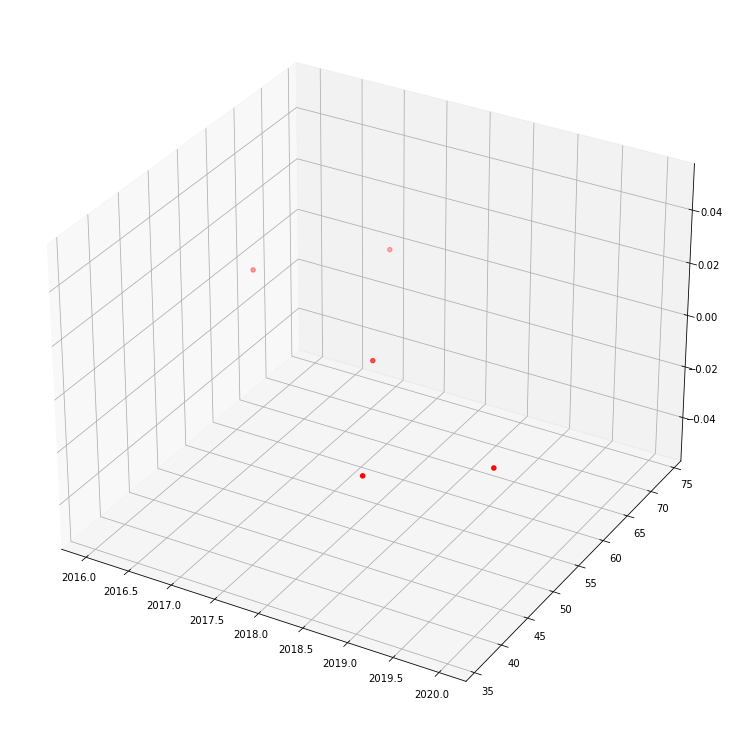

,year,WQI_def
0,2016.0,63.548507
1,2017.0,73.725625
2,2018.0,54.188293
3,2019.0,36.179506
4,2020.0,43.124615


In [19]:
#visualizing the filttered data

year=final_df['year'].values
AQI=final_df['WQI_def'].values
final_df['WQI_def']=pd.to_numeric(final_df['WQI_def'],errors='coerce')
final_df['year']=pd.to_numeric(final_df['year'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()
final_df

In [20]:
#final_df = final_df[np.isfinite(final_df['wqi'])]
#final_df

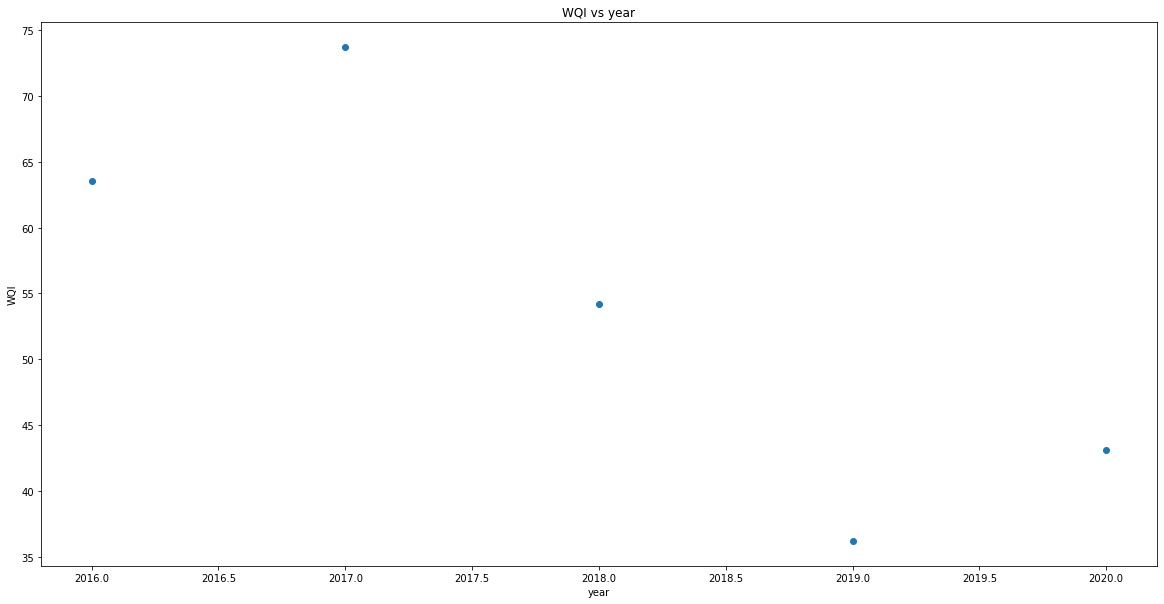

In [21]:
#scatter plot of data points
cols =['year']
y = final_df['WQI_def']
x=final_df[cols]

plt.scatter(x,y)
plt.xlabel('year')
plt.ylabel('WQI')
plt.title('WQI vs year')
plt.show()

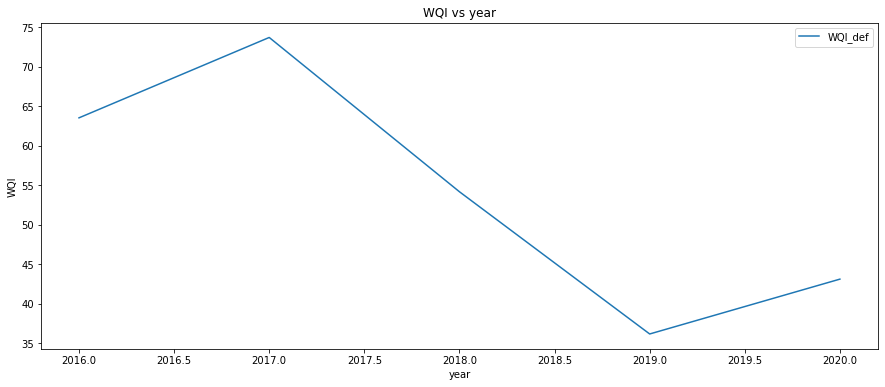

In [22]:
import matplotlib.pyplot as plt
final_df=final_df.set_index('year')
final_df.plot(figsize=(15,6))
plt.xlabel('year')
plt.ylabel('WQI')
plt.title('WQI vs year')
plt.show()

In [23]:
from sklearn import neighbors,datasets
final_df=final_df.reset_index(level=0,inplace=False)
final_df

,year,WQI_def
0,2016.0,63.548507
1,2017.0,73.725625
2,2018.0,54.188293
3,2019.0,36.179506
4,2020.0,43.124615


In [24]:
#using linear regression to predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split

In [25]:
cols =['year']


In [26]:
y = final_df['WQI_def']
x=final_df[cols]

## Linear Regression

In [27]:
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)

In [28]:
reg.fit(x_train,y_train)

LinearRegression()

In [29]:
x_train

,year
1,2017.0
4,2020.0
2,2018.0


In [30]:
y_train

1    73.725625
4    43.124615
2    54.188293
Name: WQI_def, dtype: float64

In [31]:
a=reg.predict(x_test)
a

array([79.25746365, 50.65723884])

In [32]:
y_test

0    63.548507
3    36.179506
Name: WQI_def, dtype: float64

In [33]:
reg.score(x_test,y_test)

-0.21852638805041358

In [34]:
reg.predict([[2022]])

array([22.05701404])

In [198]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a}) 
dt

,Actual,Predicted
0,63.548507,79.257464


In [38]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:228.19


In [36]:
#using gradient descent to optimize it further
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        , -1.26491106],
       [ 1.        , -0.63245553],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.63245553],
       [ 1.        ,  1.26491106]])

In [37]:
alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 54.15, -12.40


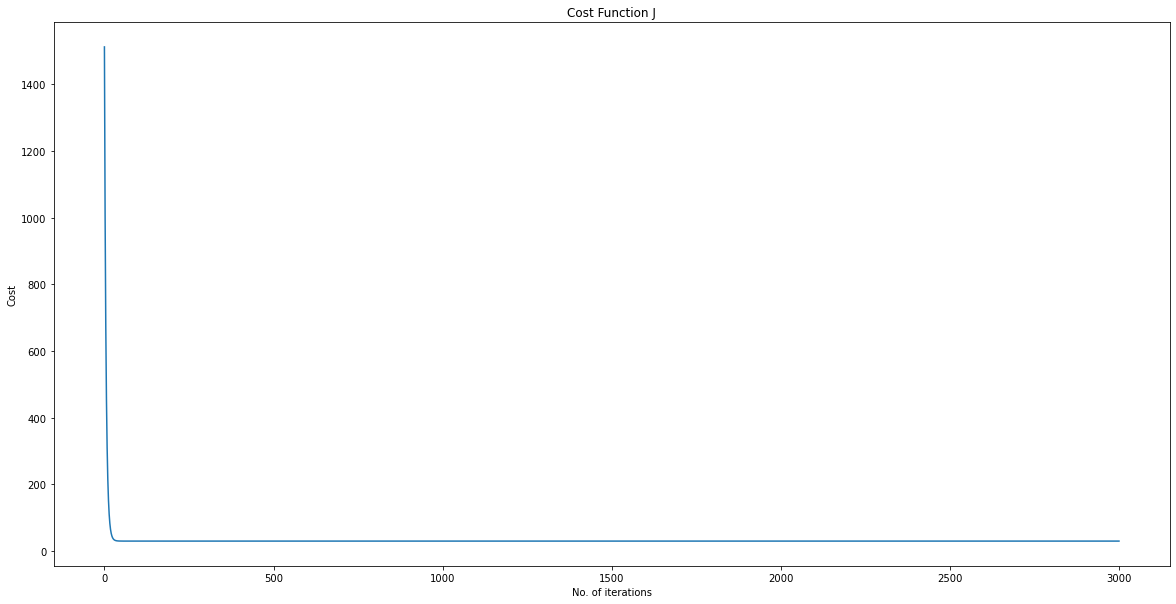

In [201]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [204]:
#prediction of january(2013-2015) across india
import numpy as np
newB=[54.15, -12.40]
# newB=[74.76, 2.13]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   

y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([final_df, dt], axis=1)
dt

,index,year,WQI_def,Actual,Predicted
0,0,2016.0,63.548507,63.548507,69.834897
1,1,2017.0,73.725625,73.725625,61.992449
2,2,2018.0,54.188293,54.188293,54.150000
3,3,2019.0,36.179506,36.179506,46.307551
4,4,2020.0,43.124615,43.124615,38.465103


In [205]:
#testing the accuracy of the model

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))
   

7.764997724943783


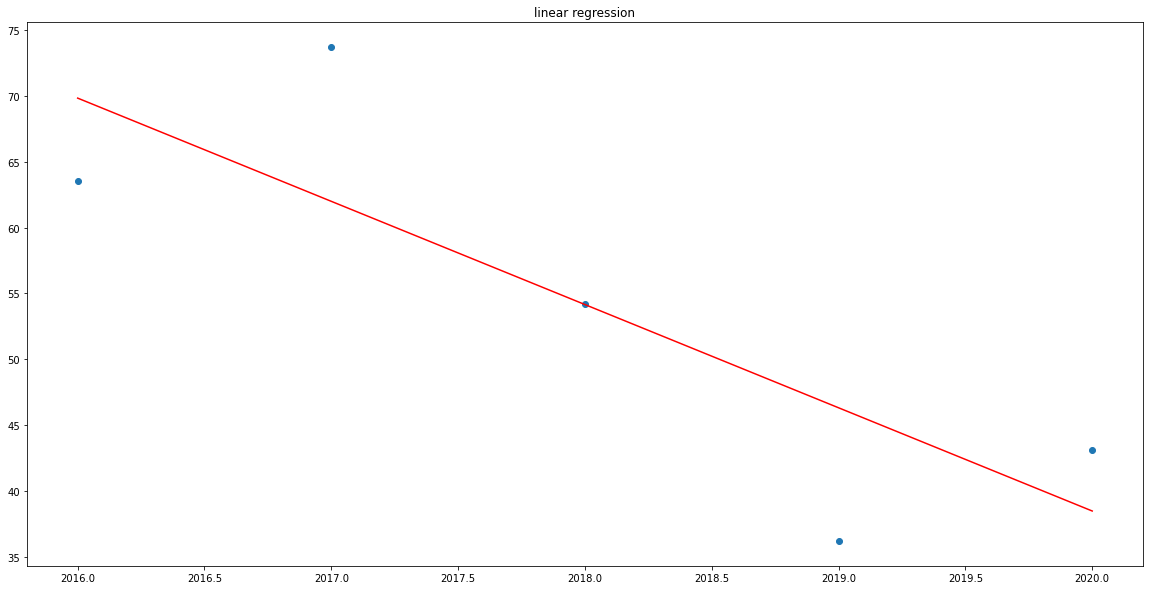

In [206]:
#plotting the actual and predicted results
x_axis=dt.year
y_axis=dt.Actual
y1_axis=dt.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()


## Q.1 Calculate the WQI of 2019 ?

In [207]:
reg.predict([[2022]])

array([13.37037444])

In [208]:
reg.predict([[2023]])

array([2.3891929])

In [209]:
reg.predict([[2024]])

array([-8.59198864])

## SVM Algorithm

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.svm import SVC

model=SVC()

In [ ]:
model.fit(x_train, y_train)

In [ ]:
rom sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.svm import SVC
svm= SVC()
